# 活性酶预测实战
1. 基于T-R-Train.csv 数据建立线性回归模型，计算R2分数，可视化结果

In [1]:
# load the train data
import pandas as pd
import numpy as np
data_train = pd.read_csv('./data/过拟合/T-R-train.csv')
data_train.head()


,T,rate
0,46.53,2.49
1,48.14,2.56
2,50.15,2.63
3,51.36,2.69
4,52.57,2.74


In [2]:
# define x_train, y_train
x_train = data_train.loc[:,'T']
y_train = data_train.loc[:,'rate']

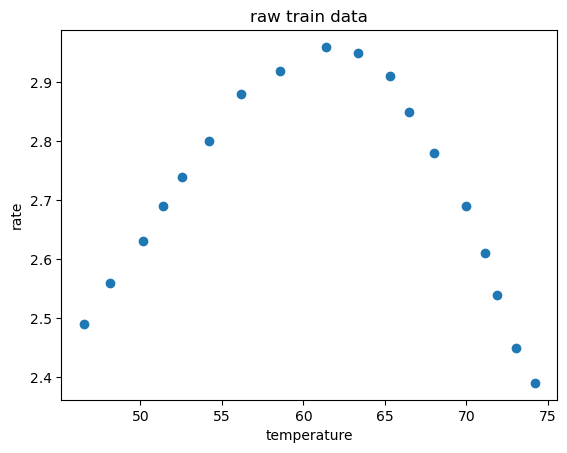

In [3]:
# visulize the data
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(x_train,y_train)
plt.title('raw train data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [4]:
print(type(x_train))
x_train = np.array(x_train).reshape(-1,1)
print(type(x_train))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [5]:
# establish the linear model
from sklearn.linear_model import LinearRegression
lp = LinearRegression()
lp.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [7]:
# load the test data
data_test = pd.read_csv('./data/过拟合/T-R-test.csv')
data_test.head()

,T,rate
0,45.376344,2.334559
1,52.186380,2.775735
2,61.863799,2.930147
3,73.154122,2.488971
4,78.888889,1.981618


In [8]:
# define x_test, y_test
x_test = data_test.loc[:,'T']
x_test = np.array(x_test).reshape(-1,1)
y_test = data_test.loc[:,'rate']
y_test_predict = lp.predict(x_test)
y_train_predict = lp.predict(x_train)
print(y_test_predict)

[2.75328317 2.73614229 2.7117842  2.68336643 2.66893201 2.6599105
 2.75914715]


In [9]:
# calculate the r2 score
from sklearn.metrics import r2_score
r2_test = r2_score(y_test,y_test_predict)
r2_train = r2_score(y_train,y_train_predict)
print(r2_test,r2_train)

-0.758336343735132 0.01666570388698163


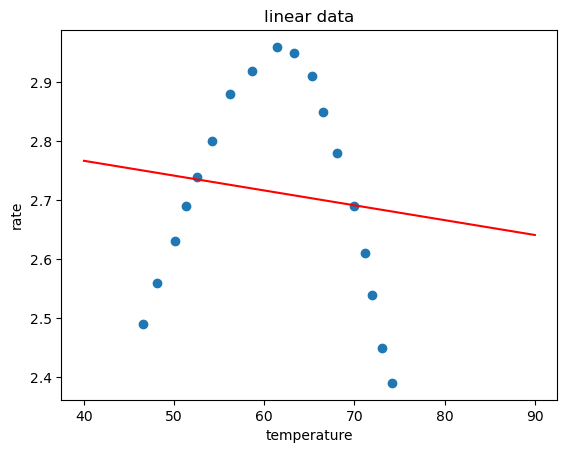

In [21]:
# visulize the data
x_range = np.linspace(40,90,300).reshape(-1,1)
y_range_predict = lp.predict(x_range)
fig2 = plt.figure()
plt.scatter(x_train,y_train)
plt.plot(x_range,y_range_predict,'-r')
plt.title('linear data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

# 多项式模型

In [11]:
# generate the new features
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)
x2_train = poly2.fit_transform(x_train)
x2_test = poly2.transform(x_test)
print(x2_train)

[[1.0000000e+00 4.6530000e+01 2.1650409e+03]
 [1.0000000e+00 4.8140000e+01 2.3174596e+03]
 [1.0000000e+00 5.0150000e+01 2.5150225e+03]
 [1.0000000e+00 5.1360000e+01 2.6378496e+03]
 [1.0000000e+00 5.2570000e+01 2.7636049e+03]
 [1.0000000e+00 5.4180000e+01 2.9354724e+03]
 [1.0000000e+00 5.6190000e+01 3.1573161e+03]
 [1.0000000e+00 5.8580000e+01 3.4316164e+03]
 [1.0000000e+00 6.1370000e+01 3.7662769e+03]
 [1.0000000e+00 6.3340000e+01 4.0119556e+03]
 [1.0000000e+00 6.5310000e+01 4.2653961e+03]
 [1.0000000e+00 6.6470000e+01 4.4182609e+03]
 [1.0000000e+00 6.8030000e+01 4.6280809e+03]
 [1.0000000e+00 6.9970000e+01 4.8958009e+03]
 [1.0000000e+00 7.1130000e+01 5.0594769e+03]
 [1.0000000e+00 7.1890000e+01 5.1681721e+03]
 [1.0000000e+00 7.3050000e+01 5.3363025e+03]
 [1.0000000e+00 7.4210000e+01 5.5071241e+03]]


In [12]:
lp2 = LinearRegression()
lp2.fit(x2_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [13]:
y2_train_predict = lp2.predict(x2_train)
y2_test_predict = lp2.predict(x2_test)
r2_test2 = r2_score(y_test,y2_test_predict)
r2_train2 = r2_score(y_train,y2_train_predict)
print(r2_test2,r2_train2)

0.9963954556468668 0.9700515400689428


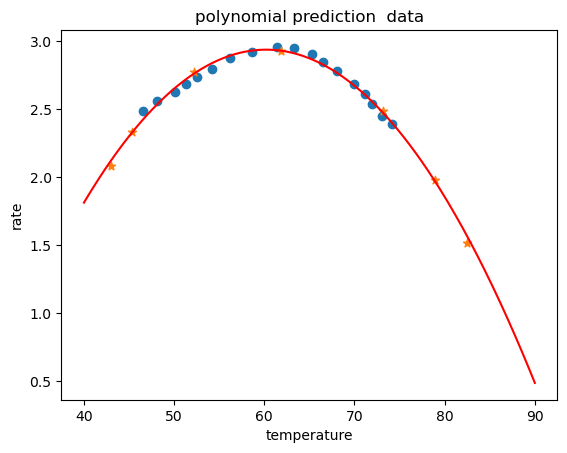

In [14]:
# visulate the data
x2_range = poly2.transform(x_range)
y2_range_predict = lp2.predict(x2_range)
fig3 = plt.figure()
plt.scatter(x_train,y_train)
plt.plot(x_range,y2_range_predict,'-r')
plt.scatter(x_test,y_test,marker='*')
plt.title('polynomial prediction  data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

# ploynomia 5

In [15]:
poly5 = PolynomialFeatures(degree=5)
x5_train = poly5.fit_transform(x_train)
x5_test = poly5.transform(x_test)
print(x5_train)

[[1.00000000e+00 4.65300000e+01 2.16504090e+03 1.00739353e+05
  4.68740210e+06 2.18104820e+08]
 [1.00000000e+00 4.81400000e+01 2.31745960e+03 1.11562505e+05
  5.37061900e+06 2.58541599e+08]
 [1.00000000e+00 5.01500000e+01 2.51502250e+03 1.26128378e+05
  6.32533818e+06 3.17215710e+08]
 [1.00000000e+00 5.13600000e+01 2.63784960e+03 1.35479955e+05
  6.95825051e+06 3.57375746e+08]
 [1.00000000e+00 5.25700000e+01 2.76360490e+03 1.45282710e+05
  7.63751204e+06 4.01504008e+08]
 [1.00000000e+00 5.41800000e+01 2.93547240e+03 1.59043895e+05
  8.61699821e+06 4.66868963e+08]
 [1.00000000e+00 5.61900000e+01 3.15731610e+03 1.77409592e+05
  9.96864496e+06 5.60138160e+08]
 [1.00000000e+00 5.85800000e+01 3.43161640e+03 2.01024089e+05
  1.17759911e+07 6.89837560e+08]
 [1.00000000e+00 6.13700000e+01 3.76627690e+03 2.31136413e+05
  1.41848417e+07 8.70523734e+08]
 [1.00000000e+00 6.33400000e+01 4.01195560e+03 2.54117268e+05
  1.60957877e+07 1.01950720e+09]
 [1.00000000e+00 6.53100000e+01 4.26539610e+03 2.7

In [16]:
lp5 = LinearRegression()
lp5.fit(x5_train,y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [17]:
y5_train_predict = lp5.predict(x5_train)
y5_test_predict = lp5.predict(x5_test)
r5_test2 = r2_score(y_test,y5_test_predict)
r5_train2 = r2_score(y_train,y5_train_predict)
print(r5_test2,r5_train2)

0.5437897253058106 0.9978527267322689


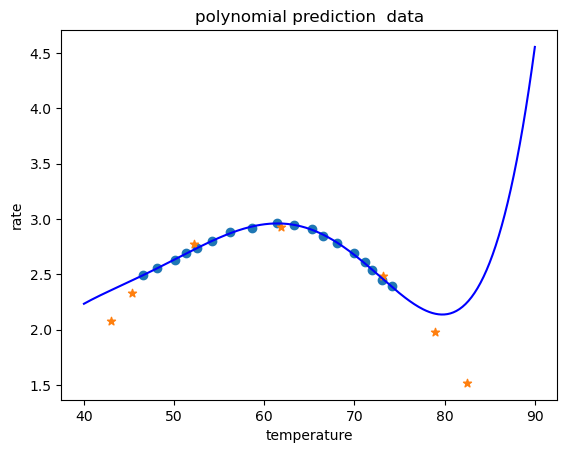

In [19]:
# visulate the data
x5_range = poly5.transform(x_range)
y5_range_predict = lp5.predict(x5_range)
fig4 = plt.figure()
plt.scatter(x_train,y_train)
plt.plot(x_range,y5_range_predict,'-b')
plt.scatter(x_test,y_test,marker='*')
plt.title('polynomial prediction  data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()